In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('reduced_project_info.csv')
data.drop(index=0, inplace = True)
data

,Unnamed: 0,id,title,date,language,restricted,rating,finished,words,hits,kudos,bookmarks,comments,description,LanguageName,RatingName,FinishedStatus
1,1,3,Analysis of the Obvious,2008-09-13,1.0,0,1.0,1.0,2751.0,9643.0,43.0,3.0,1.0,It requires a very unusual mind to undertake t...,English,Teen And Up,Finished
2,2,5,Dense Like Chocolate Cake,2008-09-13,1.0,0,1.0,1.0,4127.0,11831.0,24.0,6.0,73.0,A muttered insult takes on new meaning. Set du...,English,Teen And Up,Finished
3,3,6,Dedication,2008-09-13,1.0,0,2.0,1.0,5836.0,15812.0,25.0,6.0,57.0,The breakup between Hiro and Ayaka leaves our ...,English,Mature,Finished
4,4,7,Dedication,2008-09-13,1.0,0,2.0,1.0,5836.0,4803.0,51.0,13.0,65.0,The breakup between Hiro and Ayaka leaves our ...,English,Mature,Finished
5,5,8,His Place In the Universe,2008-09-13,1.0,0,0.0,1.0,1695.0,10520.0,202.0,30.0,56.0,The things Aang and Zuko talk about when stuck...,English,General Audiences,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,11632,The Unvictorious Ones,2009-11-15,1.0,0,0.0,1.0,29789.0,1499.0,44.0,13.0,12.0,Daniel is invited to participate in an off-wor...,English,General Audiences,Finished
9996,9996,11633,The Dangers of Curiosity,2009-11-15,1.0,0,3.0,1.0,1108.0,308.0,4.0,2.0,0.0,"Not for the first time, Blake wished he hadn't...",English,Explicit,Finished
9997,9997,11634,Living Dreams,2005-11-13,1.0,0,3.0,1.0,1070.0,2692.0,169.0,10.0,1.0,Jerome liked to torture himself with thoughts ...,English,Explicit,Finished
9998,9998,11635,Hardwood,2009-11-15,1.0,0,3.0,1.0,1606.0,422.0,9.0,0.0,0.0,Dom + Elijah = smut,English,Explicit,Finished


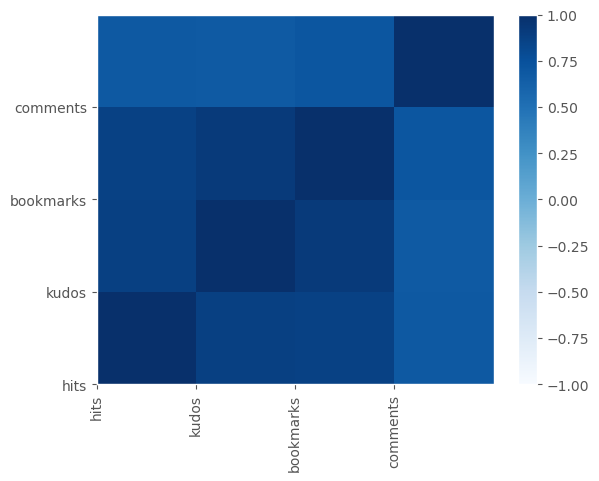

In [3]:
# Task 1 - Analyzing the Correlation Between Different Measures of Popularity

col_keep = ["hits", "kudos", "comments", "bookmarks"]

corr_data = data.copy(deep= True)

for col in corr_data.columns:
    if col not in col_keep:
        corr_data.drop(columns=[col], inplace = True)
        
corr_data = corr_data.corr()

heatmap = plt.pcolor(corr_data, cmap=plt.cm.Blues, vmin = -1, vmax = 1)
ticks = [x for x in range(0, len(corr_data.columns))]
labels = [x for x in corr_data.columns]
plt.xticks(ticks = ticks, labels = labels, rotation = 90)
plt.yticks(ticks = ticks, labels = labels)
# plot the legend on the side
plt.colorbar(heatmap)
    

So we see that kudos and bookmarks have the highest correlation, and all four types of measures of engagement are positively correlated. Comments are not as correlated with the other three measures, and thus may not be needed in a linear regression model.

In [4]:
restricted = data.groupby('restricted').count()
print(restricted.head())
56545/(943454+56545)

            Unnamed: 0    id  title  date  language  rating  finished  words  \
restricted                                                                     
0                 9380  9380   9374  9374      9374    9374      9374   9374   
1                  619   619      0     0         0       0         0      0   

            hits  kudos  bookmarks  comments  description  LanguageName  \
restricted                                                                
0           9374   9374       9374      9374         8671          9374   
1              0      0          0         0            0             0   

            RatingName  FinishedStatus  
restricted                              
0                 9374            9374  
1                    0               0  


0.056545056545056545

There is a small portion of fanfic authors that restrict data scraping. About 6% of authors.

In [46]:
# create data set without restricted data
useful_data = data[data['restricted']==0]
useful_data = useful_data[['title','date','language','restricted','rating','finished','words','hits','kudos','bookmarks','comments','description','LanguageName','RatingName','FinishedStatus']]
useful_data

,title,date,language,restricted,rating,finished,words,hits,kudos,bookmarks,comments,description,LanguageName,RatingName,FinishedStatus
1,Analysis of the Obvious,2008-09-13,1.0,0,1.0,1.0,2751.0,9643.0,43.0,3.0,1.0,It requires a very unusual mind to undertake t...,English,Teen And Up,Finished
2,Dense Like Chocolate Cake,2008-09-13,1.0,0,1.0,1.0,4127.0,11831.0,24.0,6.0,73.0,A muttered insult takes on new meaning. Set du...,English,Teen And Up,Finished
3,Dedication,2008-09-13,1.0,0,2.0,1.0,5836.0,15812.0,25.0,6.0,57.0,The breakup between Hiro and Ayaka leaves our ...,English,Mature,Finished
4,Dedication,2008-09-13,1.0,0,2.0,1.0,5836.0,4803.0,51.0,13.0,65.0,The breakup between Hiro and Ayaka leaves our ...,English,Mature,Finished
5,His Place In the Universe,2008-09-13,1.0,0,0.0,1.0,1695.0,10520.0,202.0,30.0,56.0,The things Aang and Zuko talk about when stuck...,English,General Audiences,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Unvictorious Ones,2009-11-15,1.0,0,0.0,1.0,29789.0,1499.0,44.0,13.0,12.0,Daniel is invited to participate in an off-wor...,English,General Audiences,Finished
9996,The Dangers of Curiosity,2009-11-15,1.0,0,3.0,1.0,1108.0,308.0,4.0,2.0,0.0,"Not for the first time, Blake wished he hadn't...",English,Explicit,Finished
9997,Living Dreams,2005-11-13,1.0,0,3.0,1.0,1070.0,2692.0,169.0,10.0,1.0,Jerome liked to torture himself with thoughts ...,English,Explicit,Finished
9998,Hardwood,2009-11-15,1.0,0,3.0,1.0,1606.0,422.0,9.0,0.0,0.0,Dom + Elijah = smut,English,Explicit,Finished


# Question 1: 
### How many languages are found on AO3 and what percentage are they relative to all works?

In [48]:
lang = useful_data.groupby('LanguageName').count()
print(lang['language'])
print()
print('Number of unique languages in data set:',len(lang))
print()
print('Number of entries in data set:',len(useful_data))
print()
# for i in range(len(lang['id'])):
#     print(lang.iloc[i],'is', str(lang['id'][i]/len(useful_data))+'% of the total.' )
# for L in lang['id'].index:
print(str(lang['language'].index),'makes up', str(lang['language']/len(useful_data))+'% of the total.')
print()
for i in range(len(lang['language'].index)):
    perc = round(lang['language'][i]/len(useful_data),3)*100
    if perc >= 0.1:
        print(lang['language'].index[i], 'makes up', str(perc) + '% of the total data.')
    else:
        print(lang['language'].index[i], 'makes up less than 0.1% of the total data.')

LanguageName
Deutsch                   21
English                 9319
Español                   13
Français                  12
Português brasileiro       1
Čeština                    8
Name: language, dtype: int64

Number of unique languages in data set: 6

Number of entries in data set: 9380

Index(['Deutsch', 'English', 'Español', 'Français', 'Português brasileiro',
       'Čeština'],
      dtype='object', name='LanguageName') makes up LanguageName
Deutsch                 0.002239
English                 0.993497
Español                 0.001386
Français                0.001279
Português brasileiro    0.000107
Čeština                 0.000853
Name: language, dtype: float64% of the total.

Deutsch makes up 0.2% of the total data.
English makes up 99.3% of the total data.
Español makes up 0.1% of the total data.
Français makes up 0.1% of the total data.
Português brasileiro makes up less than 0.1% of the total data.
Čeština makes up 0.1% of the total data.


# Question 2
### How do useful data coorelate together?

In [7]:
# # create correlation matrix from data factors
# # establish data frame based on all current data except processDate,
# corr_matrix = useful_data.drop(['Unnamed: 0','processDate','title','restricted'],axis=1)
# # form correlation data from correlation data frame
# correlation = corr_matrix.corr()
# # create heat map
# heat_map = plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.coolwarm)
# plt.xticks(np.arange(0.5,len(correlation.index),1),correlation.index)
# plt.yticks(np.arange(0.5,len(correlation.columns),1),correlation.columns,rotation='vertical')
# plt.colorbar(heat_map)